# Mind-the-Gap Index - Result analysis

This Notebook is used to analyze the first result of the Mind-The-Gap Index, testing different aggrupation methods and its similarity with the marginalization index.

## Import libraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Download data

### Municipality boundaries

In [2]:
mun_schema = 'metropolis'
mun_folder = 'metro_list'

city = 'Guadalajara'

query = f"SELECT * FROM {mun_schema}.{mun_folder} WHERE \"city\" LIKE \'{city}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')

print(mun_gdf.shape)
mun_gdf.head(2)

(10, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,14002,14,002,Acatlán de Juárez,"POLYGON ((-103.65448 20.50346, -103.65200 20.5...",Guadalajara
1,14039,14,039,Guadalajara,"POLYGON ((-103.31164 20.75098, -103.31014 20.7...",Guadalajara


## AGEB marginalization by hexagon

In [3]:
cvegeo_list = list(mun_gdf.loc[mun_gdf.city==city]["CVEGEO"].unique())

In [4]:
# donwload hexagons with pop data
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
hex_schema = 'censo'


# Iterates over municipality codes for each metropolitan area or capital
for cvegeo in cvegeo_list:
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE \"CVEGEO\" LIKE \'{cvegeo}%%\'"
    hex_tmp = aup.gdf_from_query(query, geometry_col='geometry')
    hex_marg = pd.concat([hex_marg, hex_tmp],
    ignore_index = True, axis = 0)
print(hex_marg.shape)
hex_marg.head(2)

(1163, 17)


,geometry,hex_id_8,CVEGEO,pobtot,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,ovpt,ovsref,ovsint,ovscel,ovhac,im_2020,imn_2020
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,0.474944,2.828432,1.787101,0.1098,0.008903,0.115735,0.029676,0.697379,4.282201,0.593514,2.756871,120.556725,0.941744
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,89.333336,1.282051,7.092198,7.960199,0.0000,0.000000,0.621891,0.000000,1.492537,15.049751,0.373134,8.333333,122.339516,0.955670


## Mind-The-Gap Index

In [5]:
# donwload hexagons with time data
hex_time = gpd.GeoDataFrame()
hex_folder = 'mind_the_gap_hexres8'
hex_schema = 'mind_the_gap'


# Download time data for city
query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE \"city\" LIKE \'{city}\'"
hex_mtg = aup.gdf_from_query(query, geometry_col='geometry')

print(hex_mtg.shape)
hex_mtg.head(2)

(1173, 45)


,hex_id_8,pobtot,p_12ymas,graproes,pder_ss,pea,vivtot,tvivparhab,ocupvivpar,prom_ocup,...,idx_tasa_empleo,idx_prom_ocup_c,idx_grado_prom_esc,idx_preescolar,idx_primaria,idx_secundaria,idx_primary_education,idx_salud_primario,segregation_idx,city
0,8849ab4931fffff,61.38571,3.128572,5.114654,3.085714,2.442857,19.614285,14.828571,51.38571,2.904722,...,0.816936,0.475759,0.327443,0.001054,0.000187,0.007768,0.003000,0.054672,1.967963,Guadalajara
1,8849ab4935fffff,286.05713,16.685715,5.853688,16.457144,13.028571,97.942856,83.085720,286.05713,3.450284,...,0.816936,0.544503,0.374756,0.442161,0.114091,0.064770,0.206914,0.338447,2.567424,Guadalajara


## Data Treatment

In [6]:
hex_mtg = hex_mtg.drop(columns=['geometry'])
hex_ind = hex_marg.merge(hex_mtg, on='hex_id_8')
hex_ind.head(2)

,geometry,hex_id_8,CVEGEO,pobtot_x,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,...,idx_tasa_empleo,idx_prom_ocup_c,idx_grado_prom_esc,idx_preescolar,idx_primaria,idx_secundaria,idx_primary_education,idx_salud_primario,segregation_idx,city
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,0.474944,2.828432,1.787101,0.1098,0.008903,0.115735,...,0.340399,0.381295,0.567221,0.013858,0.003219,0.805115,0.273793,0.17738,7.938270,Guadalajara
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,89.333336,1.282051,7.092198,7.960199,0.0000,0.000000,0.621891,...,0.356506,0.369272,0.539734,0.000013,0.000001,0.294777,0.098165,0.07342,7.599211,Guadalajara


## Data analysis

### Correlation analysis

In [7]:
x = np.array(hex_ind.im_2020)
y = np.array(hex_ind.segregation_idx)
np.corrcoef(x, y)

array([[1.        , 0.46388767],
       [0.46388767, 1.        ]])

Text(0, 0.5, 'Índice Mind-The-Gap')

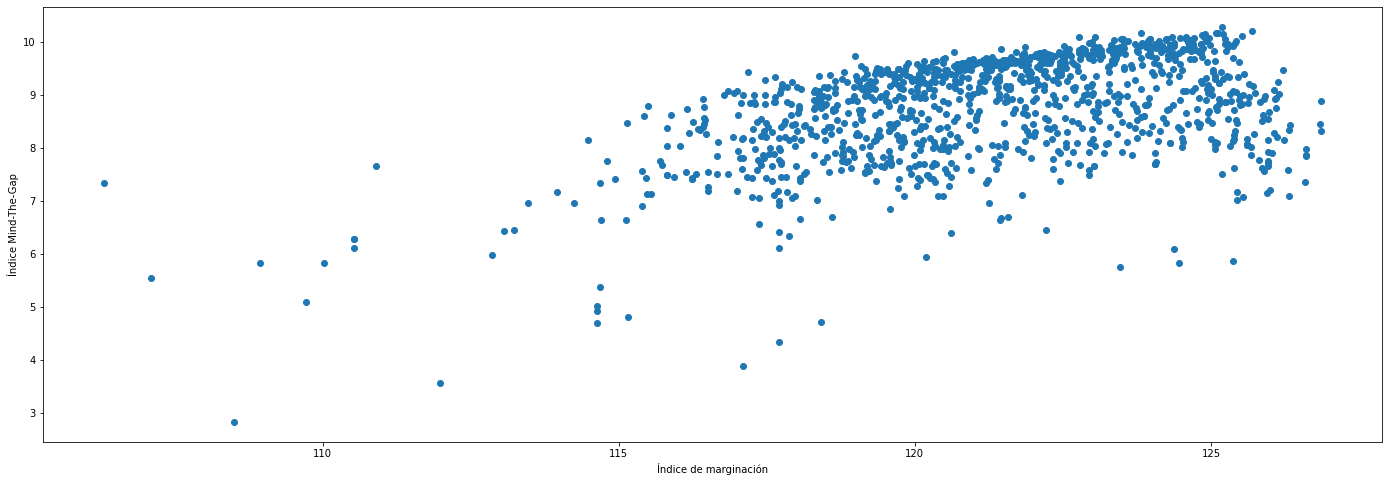

In [8]:
fig, ax = plt.subplots(figsize=(24,8))

ax.scatter(hex_ind.im_2020, hex_ind.segregation_idx)

plt.xlabel('Índice de marginación')
plt.ylabel('Índice Mind-The-Gap')

Text(0.5, 1.0, 'Índice de segregación socioespacial')

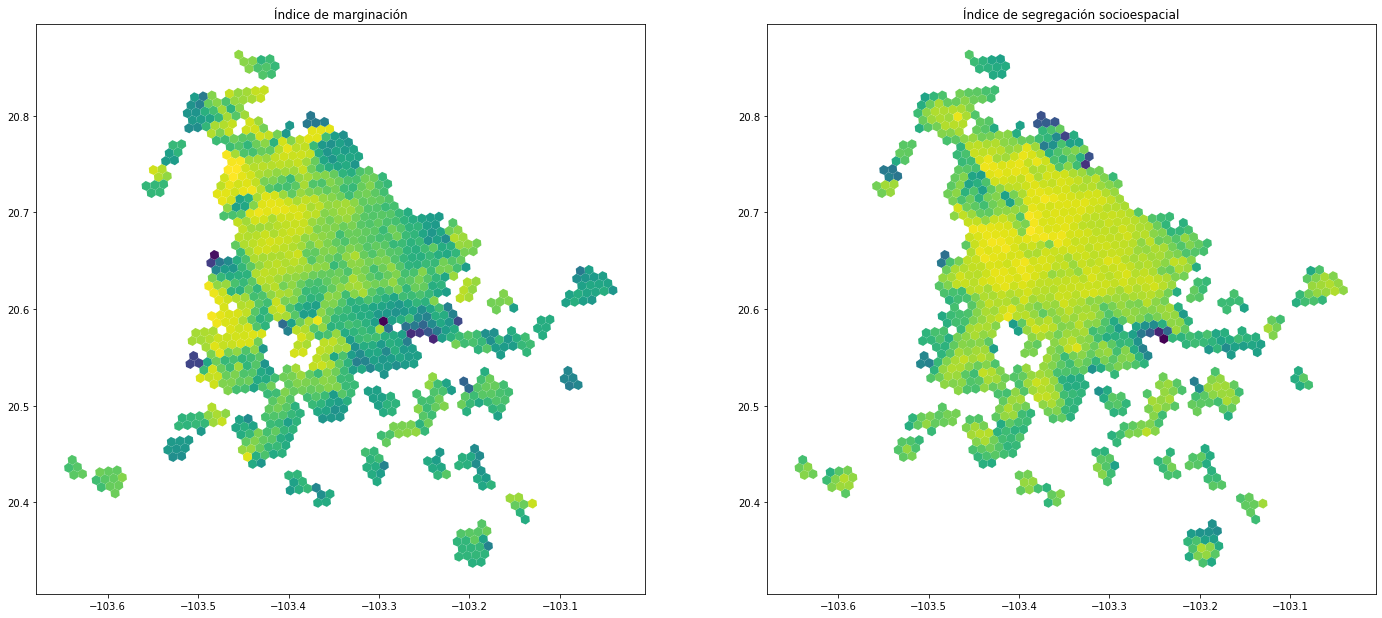

In [9]:
fig, ax = plt.subplots(1,2,figsize=(24,12))

hex_ind.plot('im_2020', ax=ax[0])
hex_ind.plot('segregation_idx', ax=ax[1])

ax[0].set_title('Índice de marginación')
ax[1].set_title('Índice de segregación socioespacial')

## Mind-The-Gap Index

In [10]:
# donwload hexagons with time data
hex_time = gpd.GeoDataFrame()
hex_folder = 'mind_the_gap_cat_hexres8'
hex_schema = 'mind_the_gap'


# Download time data for city
query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE \"city\" LIKE \'{city}\'"
hex_mtg_cat = aup.gdf_from_query(query, geometry_col='geometry')

print(hex_mtg_cat.shape)
hex_mtg_cat.head(2)

(1173, 49)


,hex_id_8,pobtot,p_12ymas,graproes,pder_ss,pea,vivtot,tvivparhab,ocupvivpar,prom_ocup,...,idx_secundaria,idx_primary_education,idx_salud_primario,pct_excusado,opportunities_idx,household_idx,services_idx,sustainability_idx,segregation_idx,city
0,8849ab4931fffff,61.38571,3.128572,5.114654,3.085714,2.442857,19.614285,14.828571,51.38571,2.904722,...,0.007768,0.003000,0.054672,0.052023,0.290457,0.195476,0.054248,0.028902,0.142271,Guadalajara
1,8849ab4935fffff,286.05713,16.685715,5.853688,16.457144,13.028571,97.942856,83.085720,286.05713,3.450284,...,0.064770,0.206914,0.338447,0.049519,0.353090,0.216676,0.150521,0.027510,0.186949,Guadalajara


## Data Treatment

In [11]:
hex_mtg_cat = hex_mtg_cat.drop(columns=['geometry'])
hex_ind = hex_marg.merge(hex_mtg_cat, on='hex_id_8')
hex_ind.head(2)

,geometry,hex_id_8,CVEGEO,pobtot_x,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,...,idx_secundaria,idx_primary_education,idx_salud_primario,pct_excusado,opportunities_idx,household_idx,services_idx,sustainability_idx,segregation_idx,city
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,0.474944,2.828432,1.787101,0.1098,0.008903,0.115735,...,0.805115,0.273793,0.17738,0.977584,0.414594,0.783815,0.657293,0.976961,0.708166,Guadalajara
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,89.333336,1.282051,7.092198,7.960199,0.0000,0.000000,0.621891,...,0.294777,0.098165,0.07342,1.000000,0.369925,0.789337,0.587800,0.992647,0.684927,Guadalajara


## Data analysis

### Correlation analysis

In [12]:
x = np.array(hex_ind.im_2020)
y = np.array(hex_ind.segregation_idx)
np.corrcoef(x, y)

array([[1.        , 0.41929981],
       [0.41929981, 1.        ]])

Text(0, 0.5, 'Índice Mind-The-Gap')

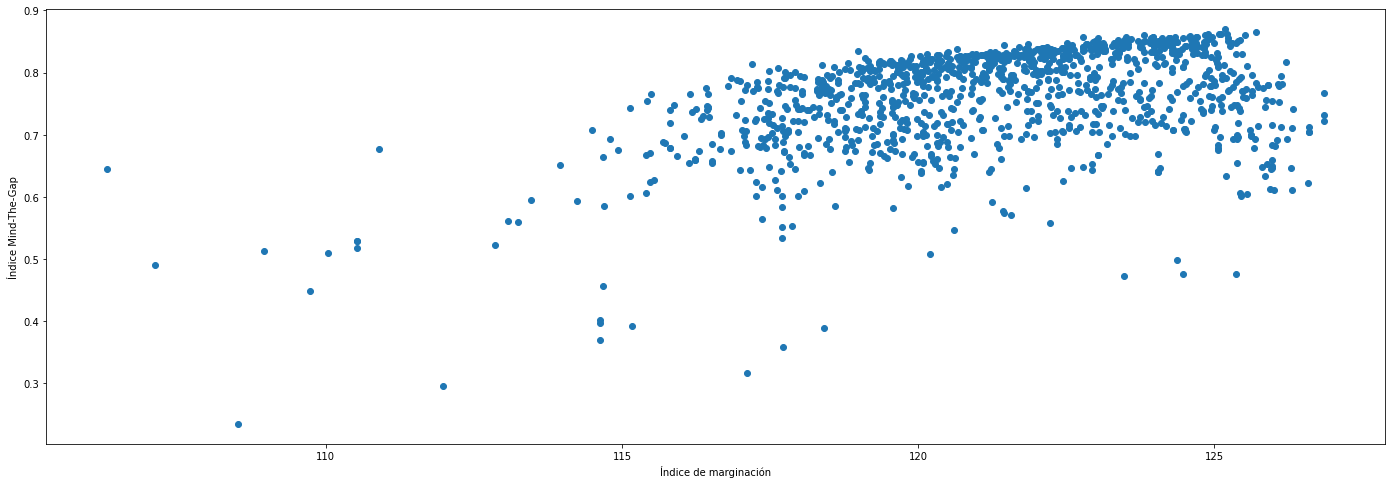

In [13]:
fig, ax = plt.subplots(figsize=(24,8))

ax.scatter(hex_ind.im_2020, hex_ind.segregation_idx)

plt.xlabel('Índice de marginación')
plt.ylabel('Índice Mind-The-Gap')

Text(0.5, 1.0, 'Índice de segregación socioespacial')

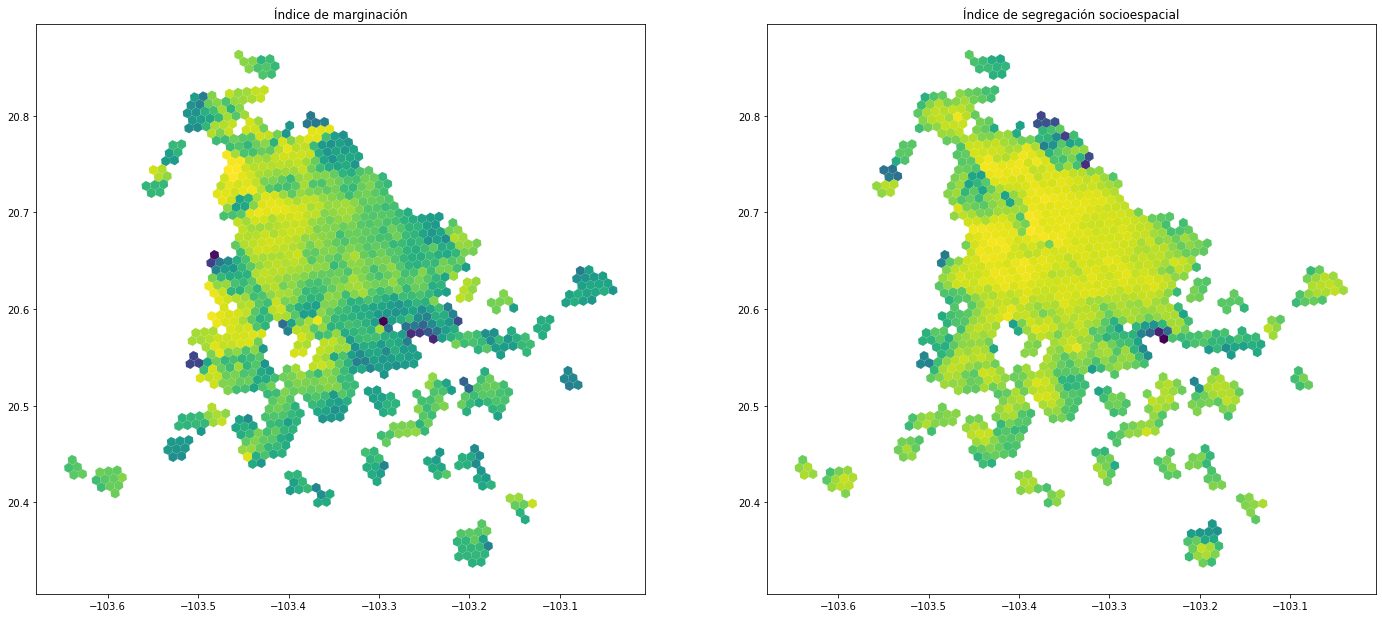

In [14]:
fig, ax = plt.subplots(1,2,figsize=(24,12))

hex_ind.plot('im_2020', ax=ax[0])
hex_ind.plot('segregation_idx', ax=ax[1])

ax[0].set_title('Índice de marginación')
ax[1].set_title('Índice de segregación socioespacial')

## Categorical vs Equi-interval

In [16]:
hex_mtg_comparison = hex_mtg[['hex_id_8','segregation_idx']].merge(hex_mtg_cat[['hex_id_8','segregation_idx']], on='hex_id_8')
hex_mtg_comparison.head(4)

,hex_id_8,segregation_idx_x,segregation_idx_y
0,8849ab4931fffff,1.967963,0.142271
1,8849ab4935fffff,2.567424,0.186949
2,88498c92c3fffff,2.821968,0.234758
3,8849ab493dfffff,3.170384,0.229809


In [17]:
x = np.array(hex_mtg_comparison.segregation_idx_x)
y = np.array(hex_mtg_comparison.segregation_idx_y)
np.corrcoef(x, y)

array([[1.        , 0.99121395],
       [0.99121395, 1.        ]])